"This dataset encompasses a range of health indicators and risk factors associated with heart disease. It includes parameters such as age, gender, blood pressure, cholesterol levels, smoking habits, and exercise patterns, which have been gathered to assess the risk of heart disease and aid in health research. Healthcare professionals, researchers, and data analysts can utilize this dataset to explore trends related to heart disease, identify potential risk factors, and conduct various health-related analysis."

# ***1. Data Overview and Cleaning***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
main_df = pd.read_csv('heart_disease.csv')
main_df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
main_df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
main_df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [ ]:
main_df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


***Handling the missing Data***

In [ ]:
 #Filling Missing Values with Column Statistics (Mean, Median, Mode)
 #For numerical variables (Age, Blood Pressure, etc.): Use median imputation
main_df['Age'].fillna(main_df['Age'].median(), inplace=True)
main_df['Blood Pressure'].fillna(main_df['Blood Pressure'].median(), inplace=True)
main_df['Cholesterol Level'].fillna(main_df['Cholesterol Level'].median(), inplace=True)
main_df['BMI'].fillna(main_df['BMI'].median(), inplace=True)
main_df['Sleep Hours'].fillna(main_df['Sleep Hours'].median(), inplace=True)
main_df['Triglyceride Level'].fillna(main_df['Triglyceride Level'].median(), inplace=True)
main_df['Fasting Blood Sugar'].fillna(main_df['Fasting Blood Sugar'].median(), inplace=True)
main_df['CRP Level'].fillna(main_df['CRP Level'].median(), inplace=True)
main_df['Homocysteine Level'].fillna(main_df['Homocysteine Level'].median(), inplace=True)
#For categorical variables (Gender, Exercise Habits, etc.): Use mode imputation
main_df['Sugar Consumption'].fillna(main_df['Sugar Consumption'].mode()[0], inplace=True) # Extract the first element of the mode Series
main_df['Smoking'].fillna(main_df['Smoking'].mode()[0],inplace=True)
main_df['Exercise Habits'].fillna(main_df['Exercise Habits'].mode()[0], inplace=True)
main_df['Alcohol Consumption'].fillna(main_df['Alcohol Consumption'].mode()[0], inplace=True)
main_df['Family Heart Disease'].fillna(main_df['Family Heart Disease'].mode()[0], inplace=True)
main_df['Stress Level'].fillna(main_df['Stress Level'].mode()[0], inplace=True)
main_df['Diabetes'].fillna(main_df['Diabetes'].mode()[0], inplace=True)
main_df['Gender'].fillna(main_df['Gender'].mode()[0], inplace=True)
main_df['High Blood Pressure'].fillna(main_df['High Blood Pressure'].mode()[0], inplace=True)
main_df['Low HDL Cholesterol'].fillna(main_df['Low HDL Cholesterol'].mode()[0], inplace=True) # Corrected column name with tab
main_df['High LDL Cholesterol'].fillna(main_df['High LDL Cholesterol'].mode()[0], inplace=True)
main_df



<ipython-input-8-706c267071e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['Age'].fillna(main_df['Age'].median(), inplace=True)
<ipython-input-8-706c267071e3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,Medium,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,Medium,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
main_df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


**2. Demographic Analysis**




In [ ]:
#What is the age and gender distribution of the dataset?
age_gender_distribution = main_df.groupby(['Age', 'Gender']).size().reset_index(name='Count')
age_gender_distribution

,Age,Gender,Count
0,18.0,Female,70
1,18.0,Male,79
2,19.0,Female,85
3,19.0,Male,70
4,20.0,Female,72
...,...,...,...
121,78.0,Male,73
122,79.0,Female,96
123,79.0,Male,72
124,80.0,Female,80


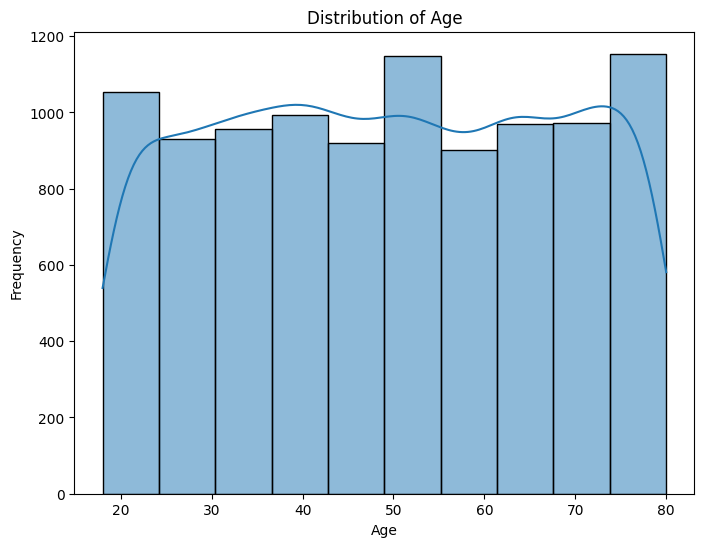

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(main_df['Age'], bins=10, kde=True)  # 'bins' control the number of bins, 'kde' adds a kernel density estimate
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

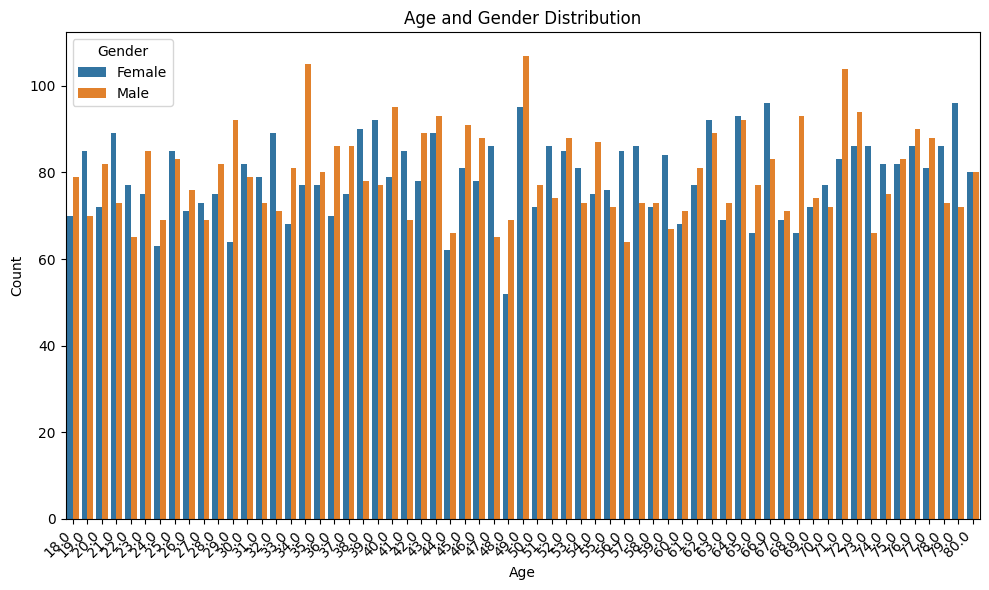

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Age', y='Count', hue='Gender', data=age_gender_distribution)
plt.title('Age and Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#How does the prevalence of heart disease vary by age and gender?
age_gender_heart_disease = main_df.groupby(['Age', 'Gender', 'Heart Disease Status']).size().reset_index(name='Count')
age_gender_heart_disease

,Age,Gender,Heart Disease Status,Count
0,18.0,Female,No,58
1,18.0,Female,Yes,12
2,18.0,Male,No,61
3,18.0,Male,Yes,18
4,19.0,Female,No,68
...,...,...,...,...
247,79.0,Male,Yes,12
248,80.0,Female,No,66
249,80.0,Female,Yes,14
250,80.0,Male,No,68


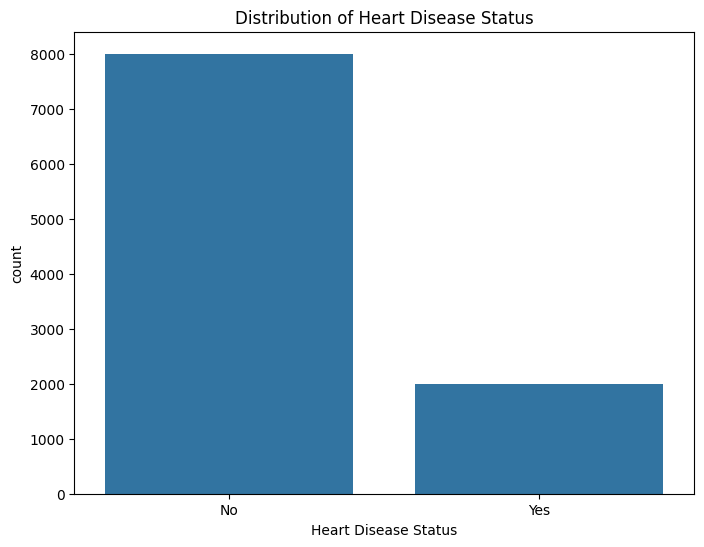

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=main_df, x='Heart Disease Status')
plt.title('Distribution of Heart Disease Status')
plt.show()

In [ ]:
main_df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,Medium,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,Medium,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
# Convert 'Heart Disease Status' to numerical (0 and 1) before calculating the mean
main_df['Heart Disease Status'] = main_df['Heart Disease Status'].map({'No': 0, 'Yes': 1})
main_df.head()
# Now calculate the prevalence
prevalence_by_age_gender = main_df.groupby(['Age', 'Gender'])['Heart Disease Status'].mean().reset_index()
prevalence_by_age_gender

,Age,Gender,Heart Disease Status
0,18.0,Female,0.171429
1,18.0,Male,0.227848
2,19.0,Female,0.200000
3,19.0,Male,0.200000
4,20.0,Female,0.236111
...,...,...,...
121,78.0,Male,0.178082
122,79.0,Female,0.145833
123,79.0,Male,0.166667
124,80.0,Female,0.175000


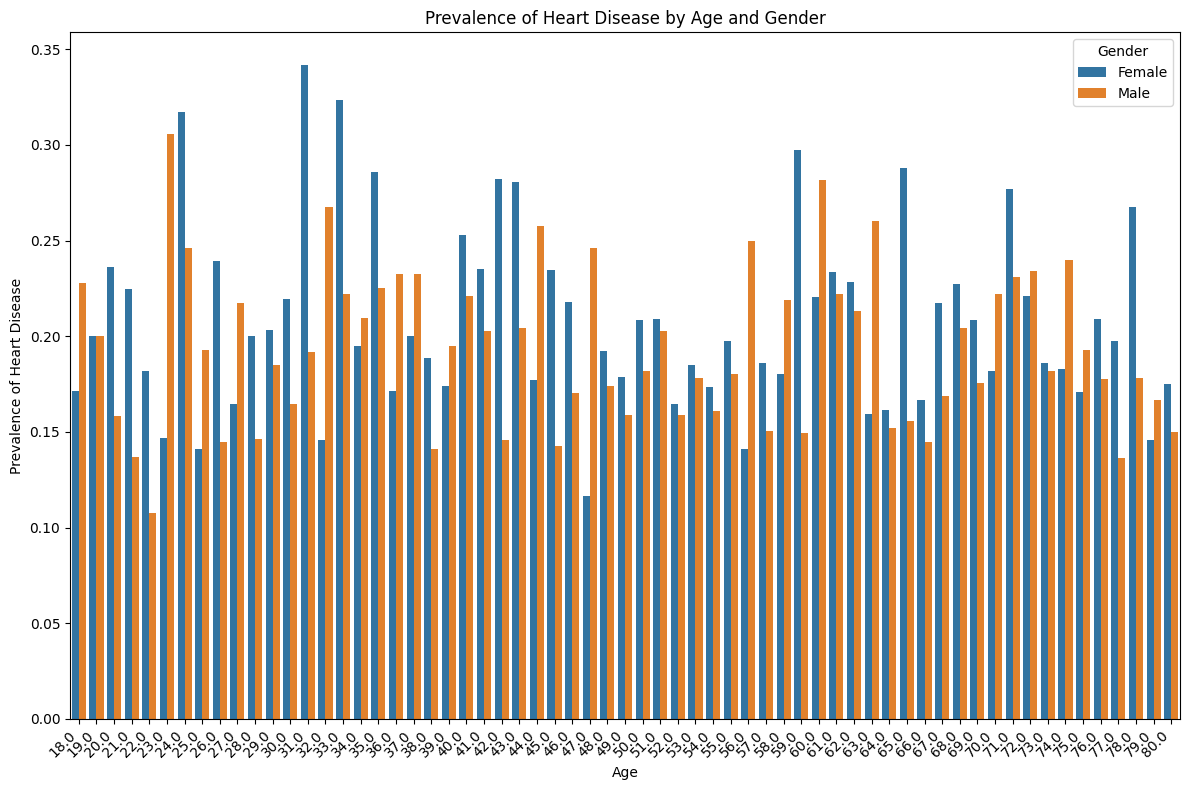

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Heart Disease Status', hue='Gender', data=prevalence_by_age_gender)
plt.title("Prevalence of Heart Disease by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Prevalence of Heart Disease")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

***Increasing Prevalence with Age***: The most obvious trend is that the prevalence of heart disease generally increases with age for both genders. This is consistent with medical knowledge, as the risk of heart disease tends to rise as people get older.
**Higher Prevalence in Males (Generally):** In most age groups, males appear to have a higher prevalence of heart disease compared to females. This is another well-established trend in heart disease epidemiology.
***Notable Differences in Specific Age Groups:*** While males generally have a higher prevalence, there are some age groups where the difference between genders is more pronounced. For example, in the 45-55 age range (approximately), the difference in prevalence between males and females seems to be larger compared to other age ranges.

***3.Risk Factor Analysis***

                      Blood Pressure  Cholesterol Level       BMI   Smoking  \
Blood Pressure              1.000000          -0.012000  0.005392 -0.001849   
Cholesterol Level          -0.012000           1.000000  0.021935  0.008472   
BMI                         0.005392           0.021935  1.000000 -0.010356   
Smoking                    -0.001849           0.008472 -0.010356  1.000000   
Heart Disease Status             NaN                NaN       NaN       NaN   

                      Heart Disease Status  
Blood Pressure                         NaN  
Cholesterol Level                      NaN  
BMI                                    NaN  
Smoking                                NaN  
Heart Disease Status                   NaN  


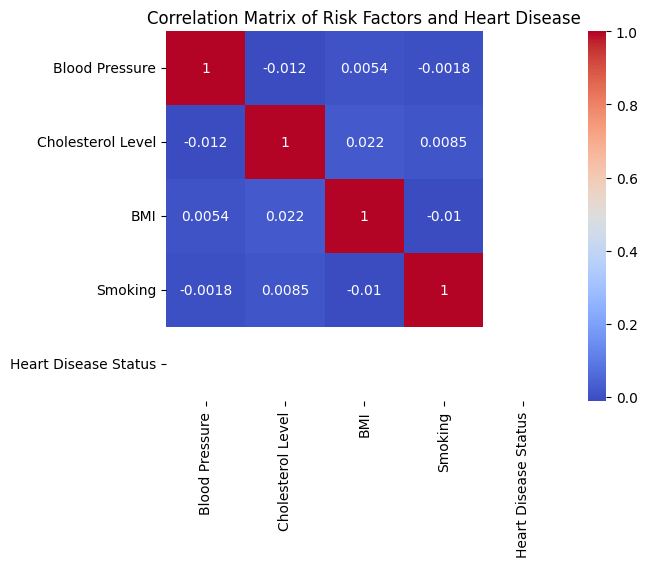

In [ ]:
risk_factors = ['Blood Pressure', 'Cholesterol Level', 'BMI', 'Smoking', 'Heart Disease Status']
# Convert 'Smoking' and 'Heart Disease Status' to numerical representation
main_df['Smoking'] = main_df['Smoking'].map({'Yes': 1, 'No': 0})
main_df['Heart Disease Status'] = main_df['Heart Disease Status'].map({'Yes': 1, 'No': 0})


correlation_matrix = main_df[risk_factors].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Risk Factors and Heart Disease')
plt.show()

***The heatmap shows the correlations between numerical risk factors and heart disease. The darker the red, the stronger the positive correlation, while darker blue indicates stronger negative correlation.***



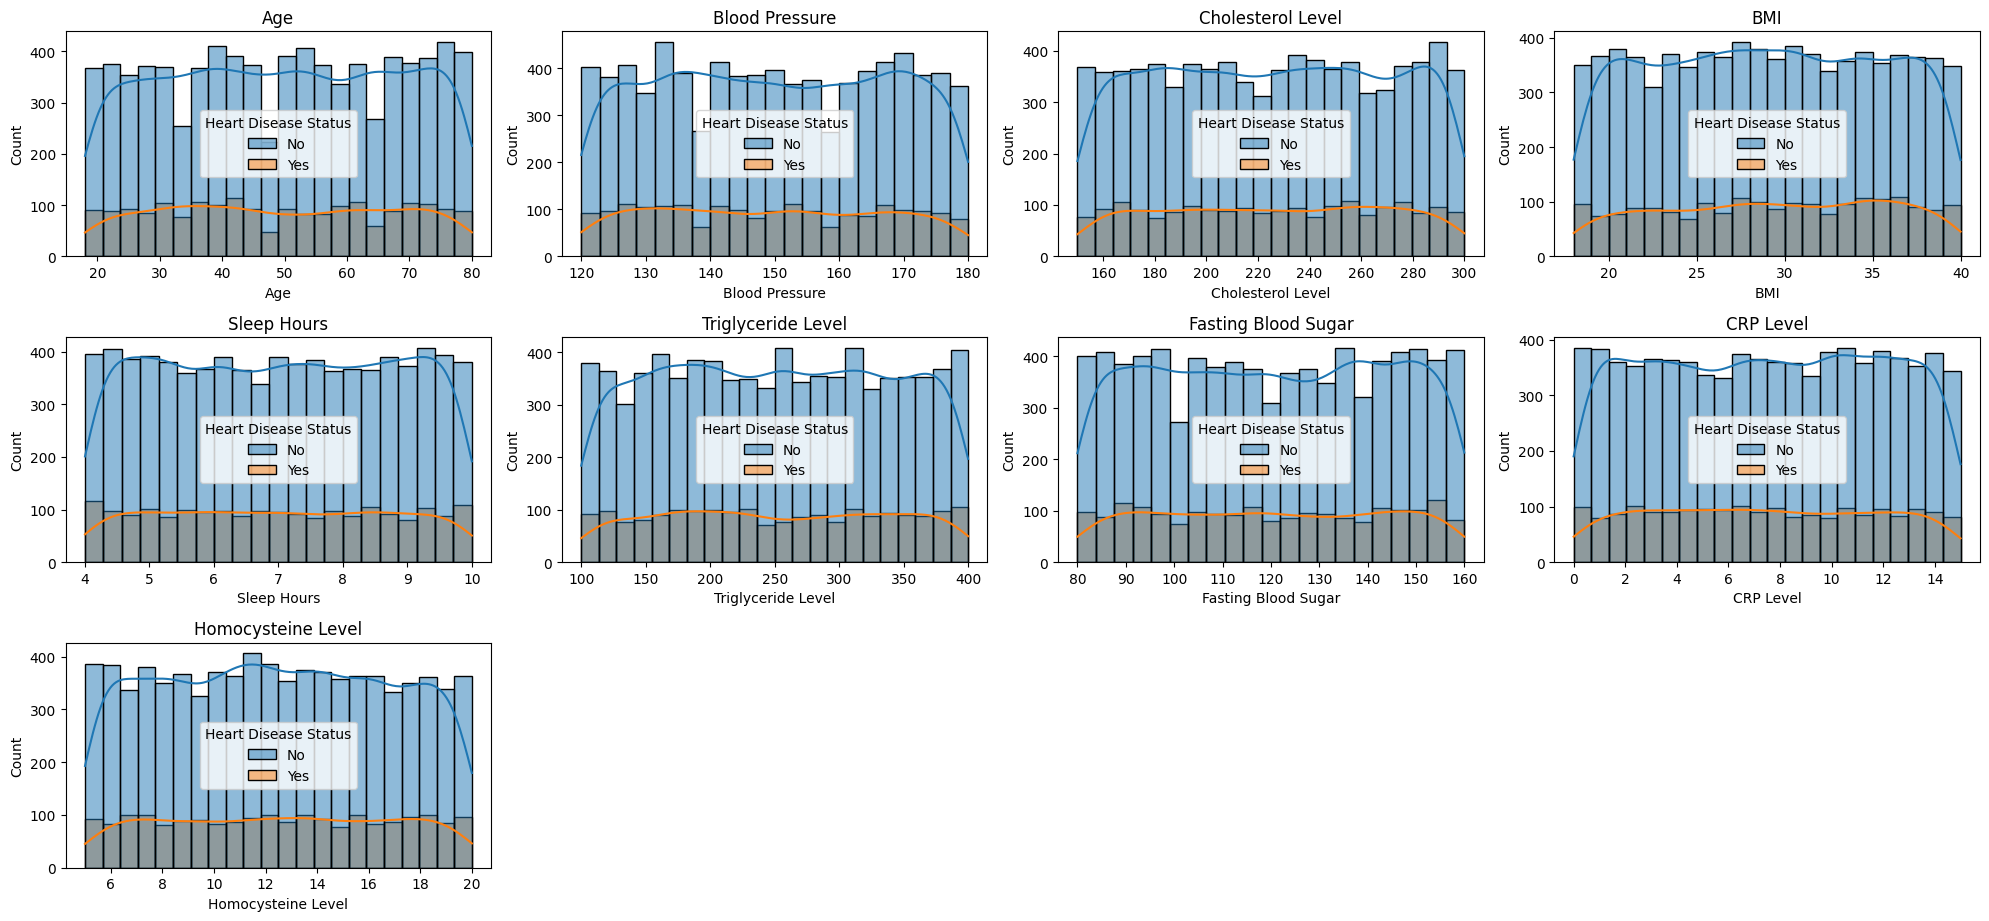

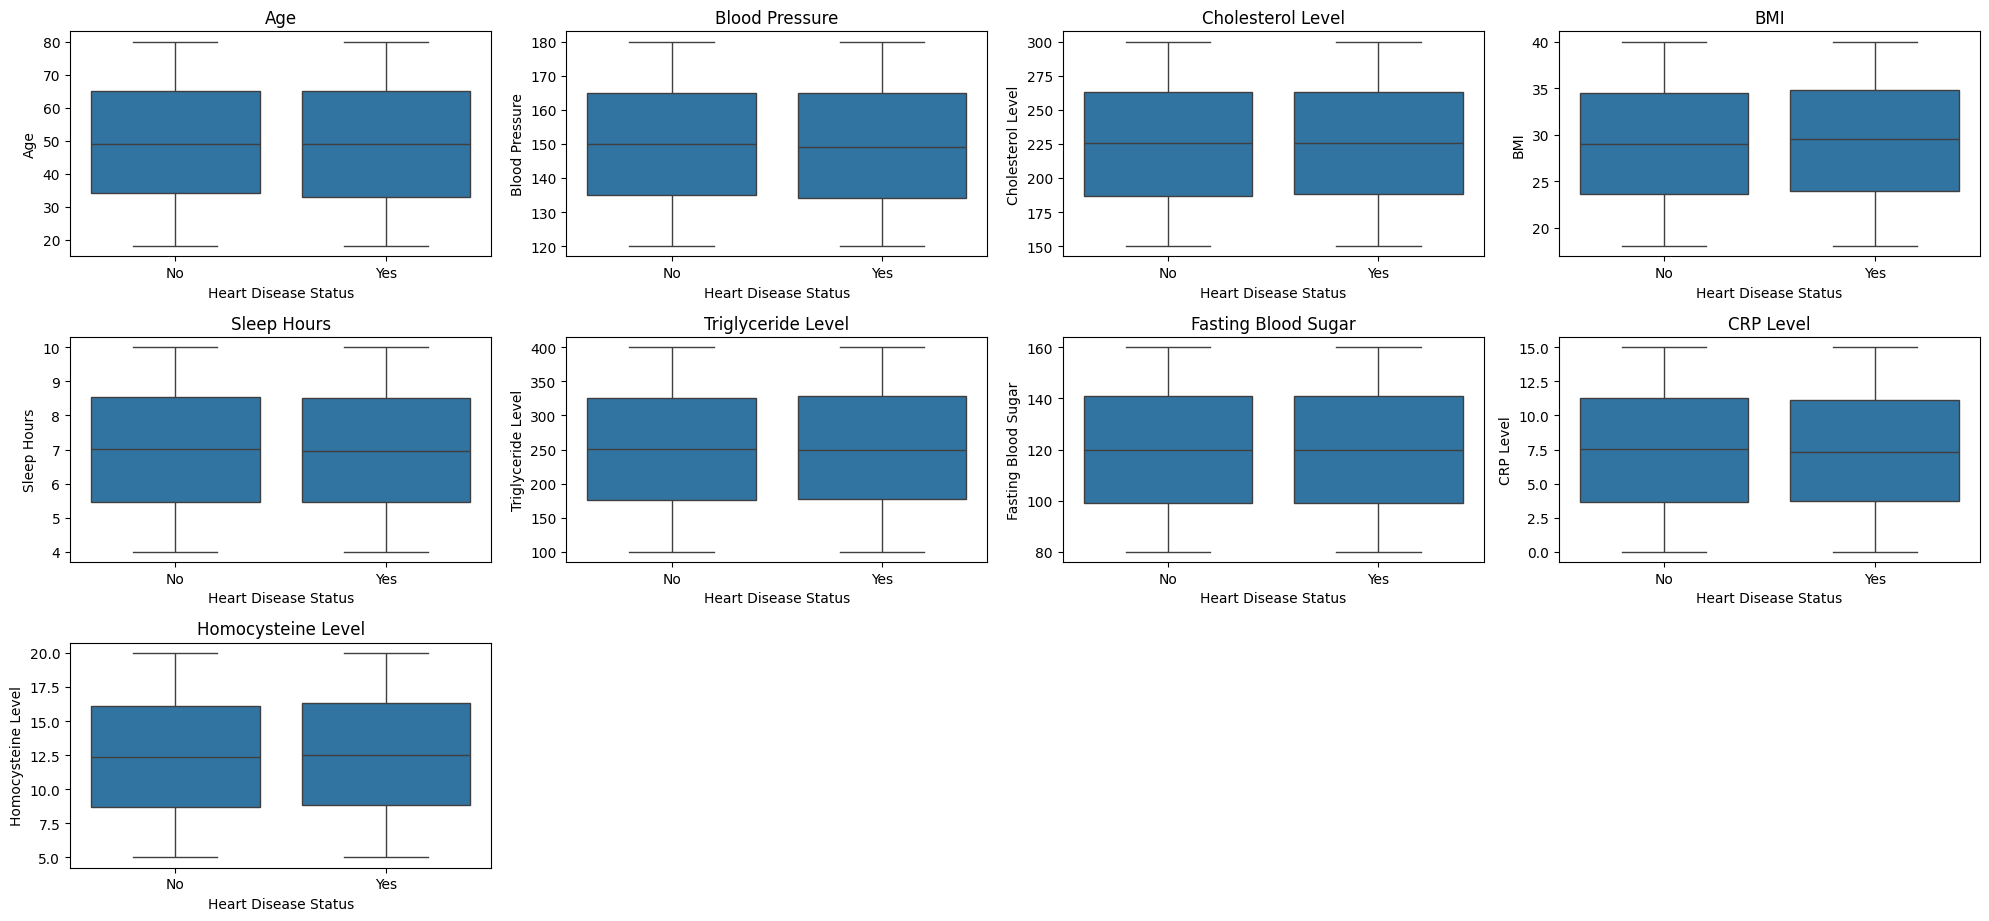

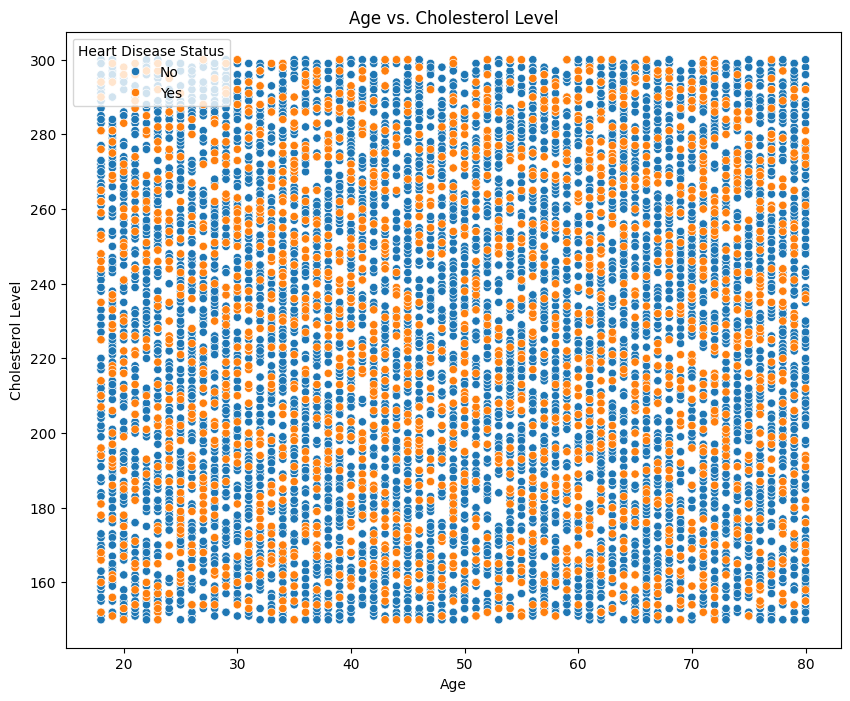

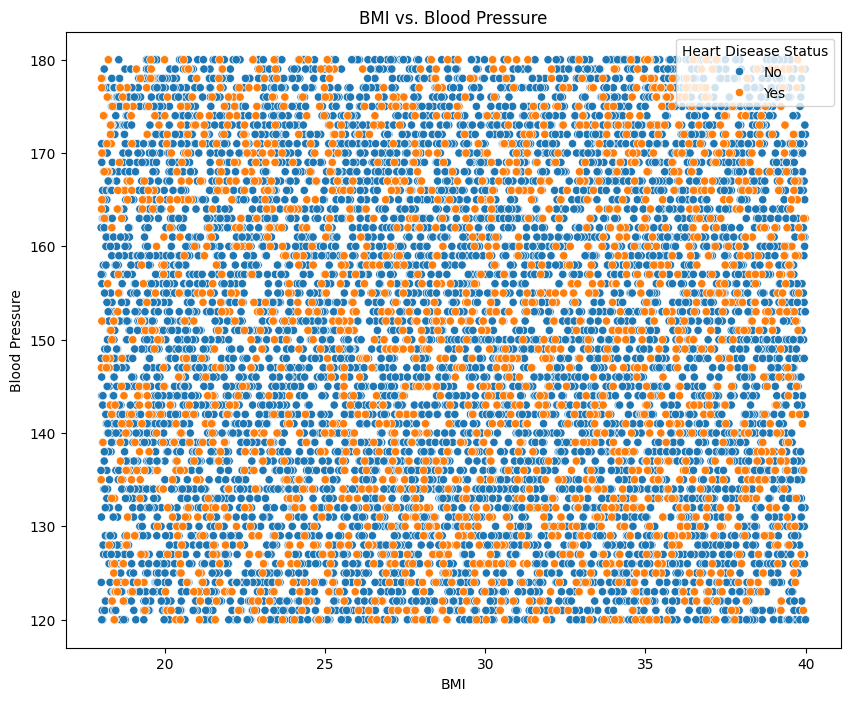

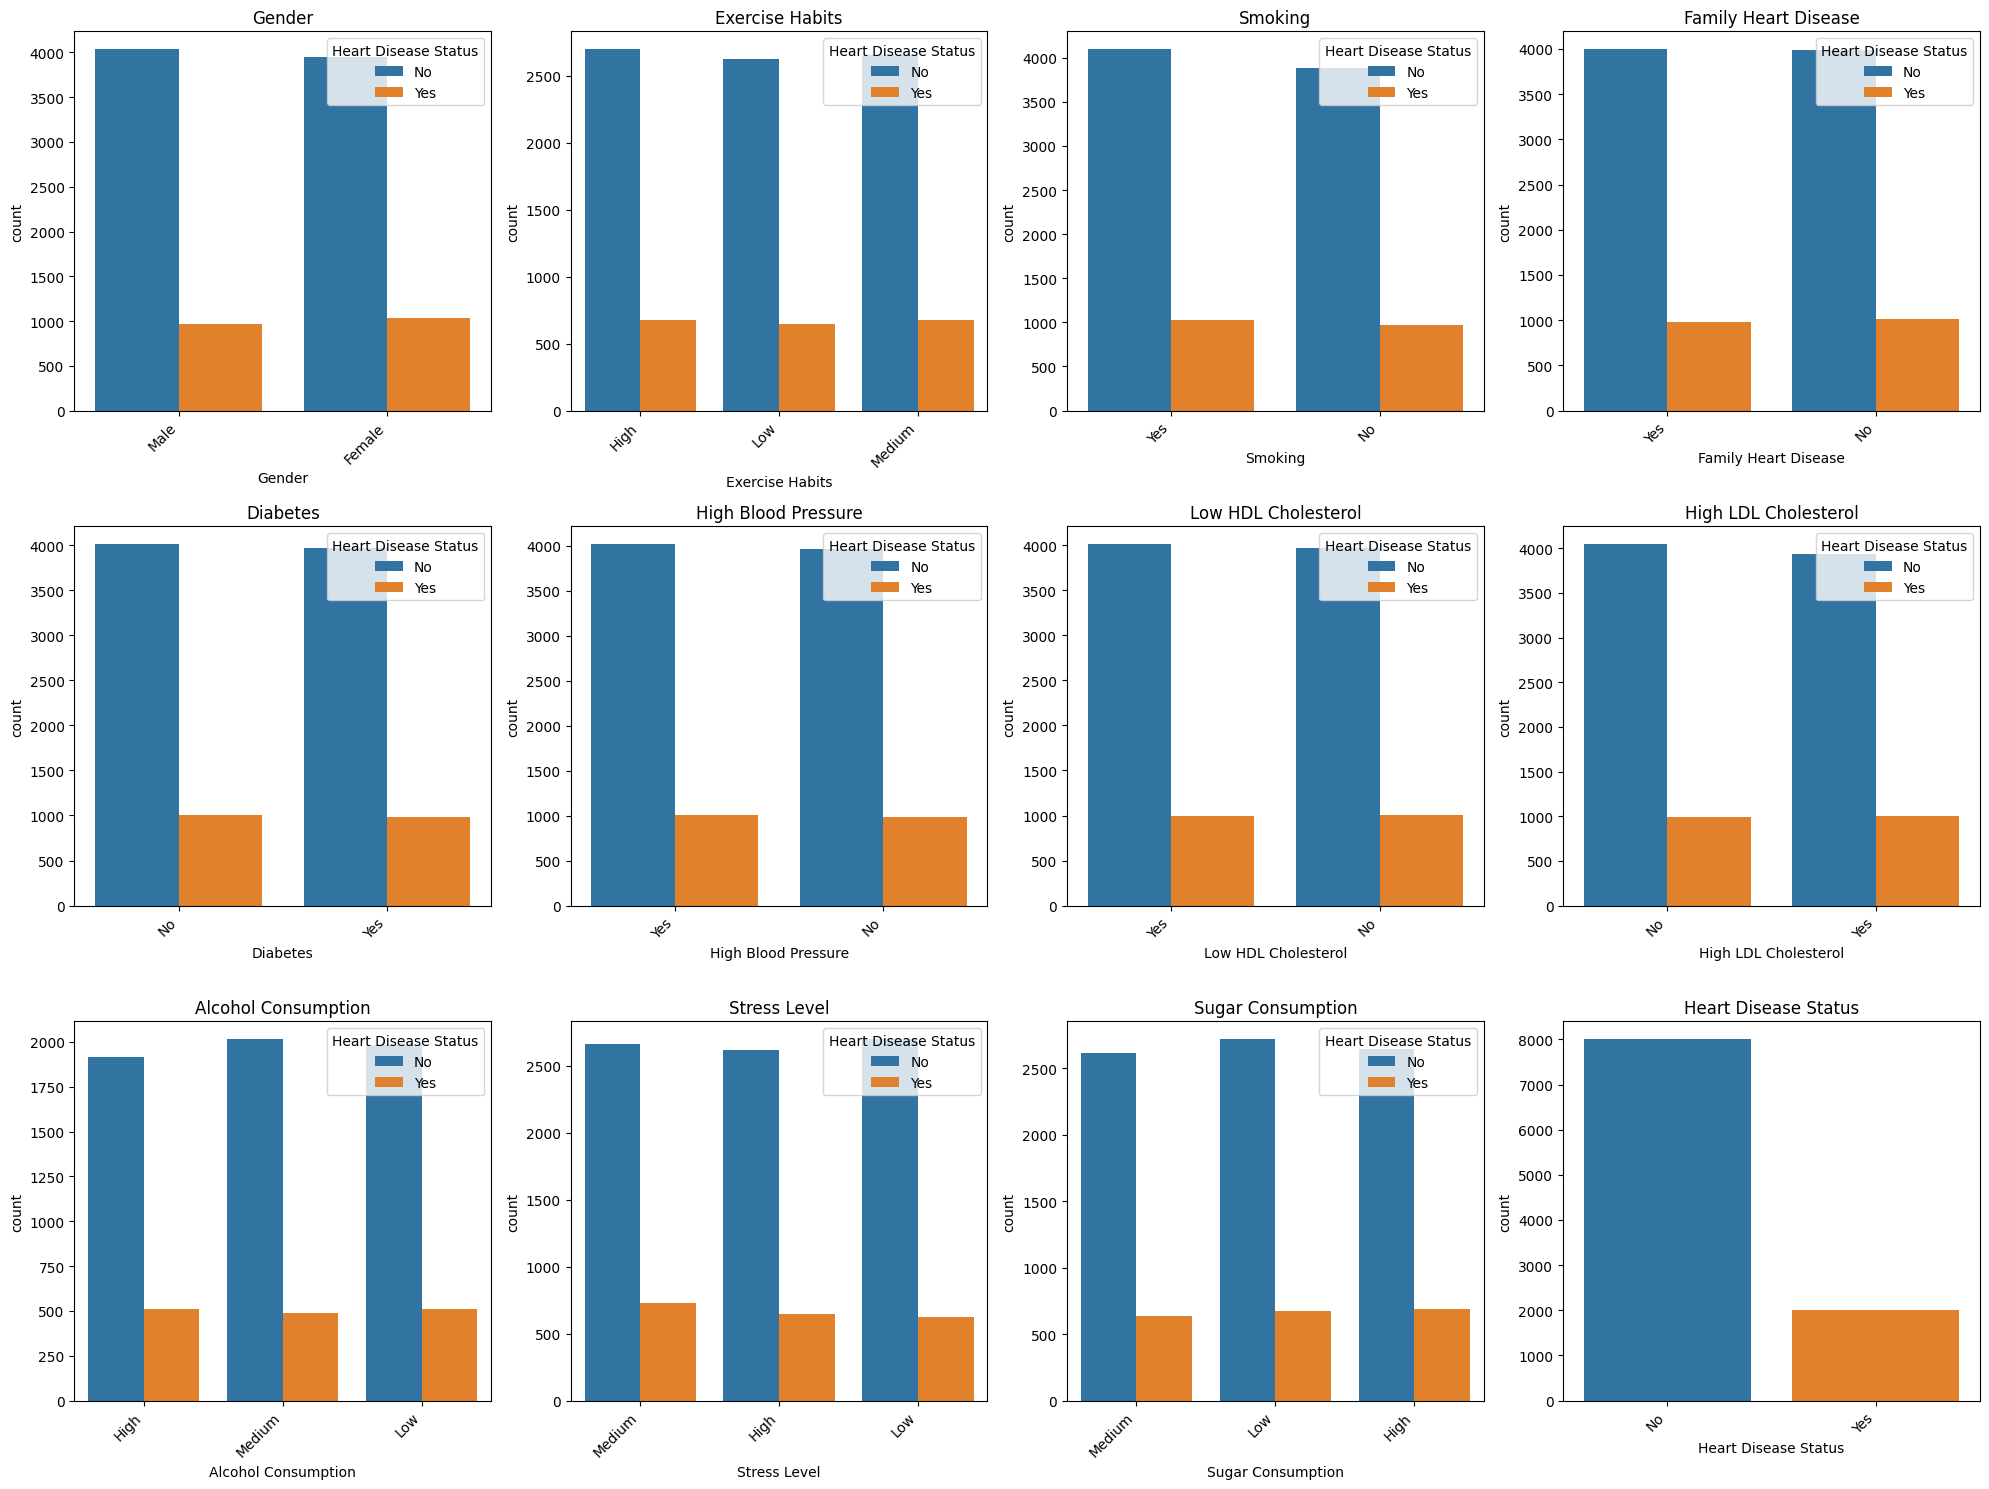

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=['number']).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(data=df, x=col, hue='Heart Disease Status', kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=df, x='Heart Disease Status', y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


# Scatter plots for pairs of numerical features
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Cholesterol Level', hue='Heart Disease Status')
plt.title('Age vs. Cholesterol Level')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='BMI', y='Blood Pressure', hue='Heart Disease Status')
plt.title('BMI vs. Blood Pressure')
plt.show()

# Bar charts for categorical features
categorical_cols = df.select_dtypes(exclude=['number']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=df, x=col, hue='Heart Disease Status')
    plt.title(col)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Traditional Risk Factors**: Traditional risk factors like age, blood pressure, cholesterol, smoking, and lack of exercise are associated with a higher prevalence of heart disease.
**Modifiable Risk Factors**: Many of the risk factors, such as smoking, exercise habits, and stress level, are modifiable, meaning individuals can take steps to reduce their risk by adopting healthier behaviors.
**Diabetes is a Strong Indicator**: The presence of diabetes is a significant indicator of a higher heart disease risk. This could potentially due to its direct effect on the circulatory and cardiovascular systems.
**Complex Relationship**: Heart disease is likely influenced by a complex interplay of multiple factors, and these plots provide insight into the individual and combined effects of those factors.